In [1]:
import pandas as pd
parquet_filename = "detection_results_debug_images.parquet"
df = pd.read_parquet(f"../parquets/{parquet_filename}")

In [2]:
df

filename  classid     score   x1   y1    x2  \
0     debug_images/0000862a233105cc.jpg        0  0.832481  239  388   394   
1     debug_images/0000862a233105cc.jpg        1  0.524345  236  386   309   
2     debug_images/0000862a233105cc.jpg        2  0.399946  240  386   310   
3     debug_images/002e555bd63acb71.jpg        0  0.853143  372   12  1020   
4     debug_images/002e555bd63acb71.jpg        0  0.791996   96  568   237   
...                                 ...      ...       ...  ...  ...   ...   
1935  debug_images/13a887093768b5ec.jpg        0  0.710493  373  336   618   
1936  debug_images/13c67cdd79ab35f0.jpg        0  0.407185  313  193   588   
1937  debug_images/13c67cdd79ab35f0.jpg        0  0.350427  462  280   741   
1938  debug_images/13c67cdd79ab35f0.jpg        1  0.388201  473  191   517   
1939  debug_images/13f2fec0dbf286c1.jpg        0  0.382574   41  242   633   

       y2  
0     506  
1     439  
2     441  
3     682  
4     680  
...   ...  
1935  545  
1936  350  
1937  429  
1938  220  
1939  710  

[1940 rows x 7 columns]

# Preprocess

In [3]:
# Mapping of values
mapping = {0: 'person', 1: 'head', 2: 'hand', 3: 'face'}

# Apply the mapping
df['label'] = df['classid'].map(mapping)

# List of values to filter by
filter_list = ['person', 'face']

# Filtering the DataFrame
df = df[df['label'].isin(filter_list)]


# filename_filter = ['/workspace/yolo_v8_training/oiv7_full/train/fba14789f51d7b37.jpg']
# df = df[df['filename'].isin(filename_filter)]

df

filename  classid     score   x1   y1    x2  \
0     debug_images/0000862a233105cc.jpg        0  0.832481  239  388   394   
3     debug_images/002e555bd63acb71.jpg        0  0.853143  372   12  1020   
4     debug_images/002e555bd63acb71.jpg        0  0.791996   96  568   237   
5     debug_images/002e555bd63acb71.jpg        0  0.759568    2  518   131   
6     debug_images/002e555bd63acb71.jpg        0  0.757808  228  499   350   
...                                 ...      ...       ...  ...  ...   ...   
1933  debug_images/138c4698f334e5ff.jpg        0  0.380026   35  111  1024   
1935  debug_images/13a887093768b5ec.jpg        0  0.710493  373  336   618   
1936  debug_images/13c67cdd79ab35f0.jpg        0  0.407185  313  193   588   
1937  debug_images/13c67cdd79ab35f0.jpg        0  0.350427  462  280   741   
1939  debug_images/13f2fec0dbf286c1.jpg        0  0.382574   41  242   633   

       y2   label  
0     506  person  
3     682  person  
4     680  person  
5     681  person  
6     682  person  
...   ...     ...  
1933  681  person  
1935  545  person  
1936  350  person  
1937  429  person  
1939  710  person  

[1058 rows x 8 columns]

In [4]:
df

filename  classid     score   x1   y1    x2  \
0     debug_images/0000862a233105cc.jpg        0  0.832481  239  388   394   
3     debug_images/002e555bd63acb71.jpg        0  0.853143  372   12  1020   
4     debug_images/002e555bd63acb71.jpg        0  0.791996   96  568   237   
5     debug_images/002e555bd63acb71.jpg        0  0.759568    2  518   131   
6     debug_images/002e555bd63acb71.jpg        0  0.757808  228  499   350   
...                                 ...      ...       ...  ...  ...   ...   
1933  debug_images/138c4698f334e5ff.jpg        0  0.380026   35  111  1024   
1935  debug_images/13a887093768b5ec.jpg        0  0.710493  373  336   618   
1936  debug_images/13c67cdd79ab35f0.jpg        0  0.407185  313  193   588   
1937  debug_images/13c67cdd79ab35f0.jpg        0  0.350427  462  280   741   
1939  debug_images/13f2fec0dbf286c1.jpg        0  0.382574   41  242   633   

       y2   label  
0     506  person  
3     682  person  
4     680  person  
5     681  person  
6     682  person  
...   ...     ...  
1933  681  person  
1935  545  person  
1936  350  person  
1937  429  person  
1939  710  person  

[1058 rows x 8 columns]

In [5]:
# Convert bounding boxes
df['cx'] = (df['x1'] + df['x2']) / 2
df['cy'] = (df['y1'] + df['y2']) / 2
df['w'] = df['x2'] - df['x1']
df['h'] = df['y2'] - df['y1']

/tmp/ipykernel_82743/1172413626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cx'] = (df['x1'] + df['x2']) / 2
/tmp/ipykernel_82743/1172413626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cy'] = (df['y1'] + df['y2']) / 2
/tmp/ipykernel_82743/1172413626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [6]:
df

filename  classid     score   x1   y1    x2  \
0     debug_images/0000862a233105cc.jpg        0  0.832481  239  388   394   
3     debug_images/002e555bd63acb71.jpg        0  0.853143  372   12  1020   
4     debug_images/002e555bd63acb71.jpg        0  0.791996   96  568   237   
5     debug_images/002e555bd63acb71.jpg        0  0.759568    2  518   131   
6     debug_images/002e555bd63acb71.jpg        0  0.757808  228  499   350   
...                                 ...      ...       ...  ...  ...   ...   
1933  debug_images/138c4698f334e5ff.jpg        0  0.380026   35  111  1024   
1935  debug_images/13a887093768b5ec.jpg        0  0.710493  373  336   618   
1936  debug_images/13c67cdd79ab35f0.jpg        0  0.407185  313  193   588   
1937  debug_images/13c67cdd79ab35f0.jpg        0  0.350427  462  280   741   
1939  debug_images/13f2fec0dbf286c1.jpg        0  0.382574   41  242   633   

       y2   label     cx     cy    w    h  
0     506  person  316.5  447.0  155  118  
3     682  person  696.0  347.0  648  670  
4     680  person  166.5  624.0  141  112  
5     681  person   66.5  599.5  129  163  
6     682  person  289.0  590.5  122  183  
...   ...     ...    ...    ...  ...  ...  
1933  681  person  529.5  396.0  989  570  
1935  545  person  495.5  440.5  245  209  
1936  350  person  450.5  271.5  275  157  
1937  429  person  601.5  354.5  279  149  
1939  710  person  337.0  476.0  592  468  

[1058 rows x 12 columns]

In [7]:
df = df[['filename', 'score', 'cx', 'cy', 'w', 'h', 'label']]
df

filename     score     cx     cy    w    h  \
0     debug_images/0000862a233105cc.jpg  0.832481  316.5  447.0  155  118   
3     debug_images/002e555bd63acb71.jpg  0.853143  696.0  347.0  648  670   
4     debug_images/002e555bd63acb71.jpg  0.791996  166.5  624.0  141  112   
5     debug_images/002e555bd63acb71.jpg  0.759568   66.5  599.5  129  163   
6     debug_images/002e555bd63acb71.jpg  0.757808  289.0  590.5  122  183   
...                                 ...       ...    ...    ...  ...  ...   
1933  debug_images/138c4698f334e5ff.jpg  0.380026  529.5  396.0  989  570   
1935  debug_images/13a887093768b5ec.jpg  0.710493  495.5  440.5  245  209   
1936  debug_images/13c67cdd79ab35f0.jpg  0.407185  450.5  271.5  275  157   
1937  debug_images/13c67cdd79ab35f0.jpg  0.350427  601.5  354.5  279  149   
1939  debug_images/13f2fec0dbf286c1.jpg  0.382574  337.0  476.0  592  468   

       label  
0     person  
3     person  
4     person  
5     person  
6     person  
...      ...  
1933  person  
1935  person  
1936  person  
1937  person  
1939  person  

[1058 rows x 7 columns]

In [8]:
df.rename(columns={'cx': 'col_x', 'cy': 'row_y', 'w': 'width', 'h': 'height'}, inplace=True)
df

/tmp/ipykernel_82743/324714309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'cx': 'col_x', 'cy': 'row_y', 'w': 'width', 'h': 'height'}, inplace=True)


filename     score  col_x  row_y  width  \
0     debug_images/0000862a233105cc.jpg  0.832481  316.5  447.0    155   
3     debug_images/002e555bd63acb71.jpg  0.853143  696.0  347.0    648   
4     debug_images/002e555bd63acb71.jpg  0.791996  166.5  624.0    141   
5     debug_images/002e555bd63acb71.jpg  0.759568   66.5  599.5    129   
6     debug_images/002e555bd63acb71.jpg  0.757808  289.0  590.5    122   
...                                 ...       ...    ...    ...    ...   
1933  debug_images/138c4698f334e5ff.jpg  0.380026  529.5  396.0    989   
1935  debug_images/13a887093768b5ec.jpg  0.710493  495.5  440.5    245   
1936  debug_images/13c67cdd79ab35f0.jpg  0.407185  450.5  271.5    275   
1937  debug_images/13c67cdd79ab35f0.jpg  0.350427  601.5  354.5    279   
1939  debug_images/13f2fec0dbf286c1.jpg  0.382574  337.0  476.0    592   

      height   label  
0        118  person  
3        670  person  
4        112  person  
5        163  person  
6        183  person  
...      ...     ...  
1933     570  person  
1935     209  person  
1936     157  person  
1937     149  person  
1939     468  person  

[1058 rows x 7 columns]

In [9]:
df['filename'] = "../" + df['filename']
df 

/tmp/ipykernel_82743/1187382872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filename'] = "../" + df['filename']


filename     score  col_x  row_y  width  \
0     ../debug_images/0000862a233105cc.jpg  0.832481  316.5  447.0    155   
3     ../debug_images/002e555bd63acb71.jpg  0.853143  696.0  347.0    648   
4     ../debug_images/002e555bd63acb71.jpg  0.791996  166.5  624.0    141   
5     ../debug_images/002e555bd63acb71.jpg  0.759568   66.5  599.5    129   
6     ../debug_images/002e555bd63acb71.jpg  0.757808  289.0  590.5    122   
...                                    ...       ...    ...    ...    ...   
1933  ../debug_images/138c4698f334e5ff.jpg  0.380026  529.5  396.0    989   
1935  ../debug_images/13a887093768b5ec.jpg  0.710493  495.5  440.5    245   
1936  ../debug_images/13c67cdd79ab35f0.jpg  0.407185  450.5  271.5    275   
1937  ../debug_images/13c67cdd79ab35f0.jpg  0.350427  601.5  354.5    279   
1939  ../debug_images/13f2fec0dbf286c1.jpg  0.382574  337.0  476.0    592   

      height   label  
0        118  person  
3        670  person  
4        112  person  
5        163  person  
6        183  person  
...      ...     ...  
1933     570  person  
1935     209  person  
1936     157  person  
1937     149  person  
1939     468  person  

[1058 rows x 7 columns]

# Verify Bbox Conversion

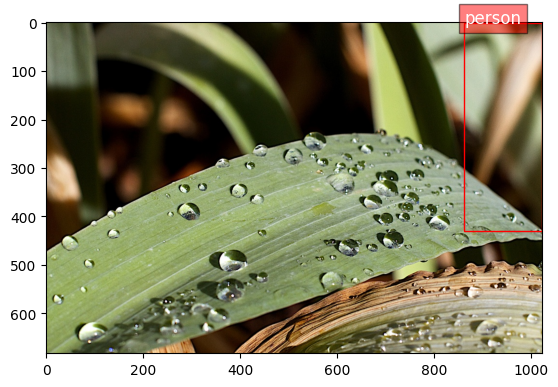

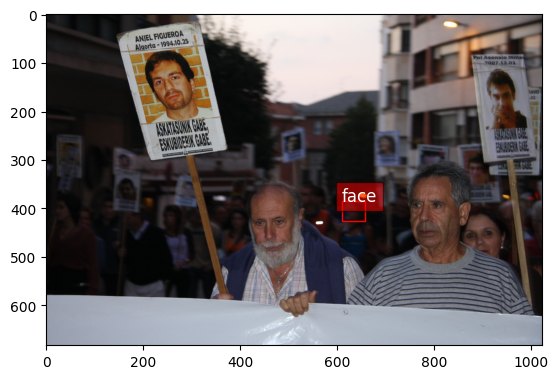

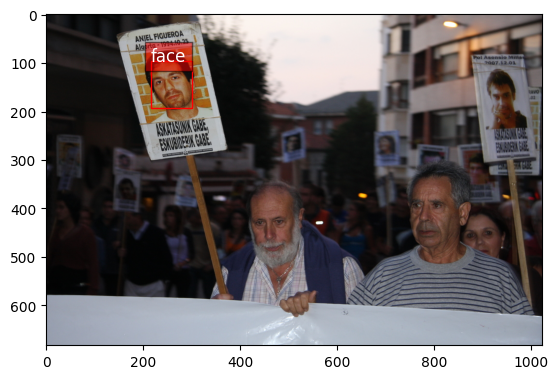

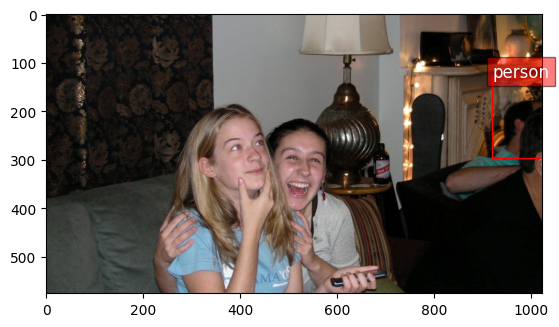

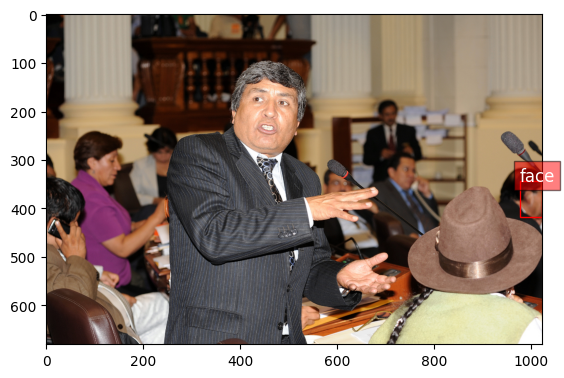

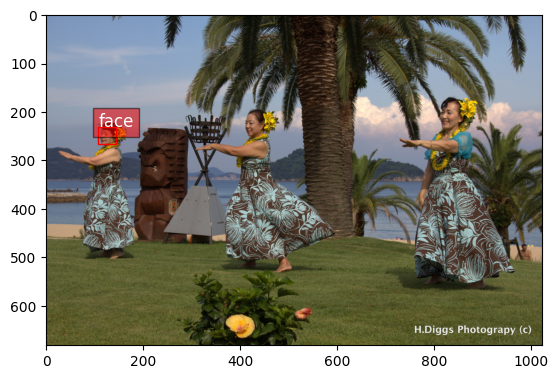

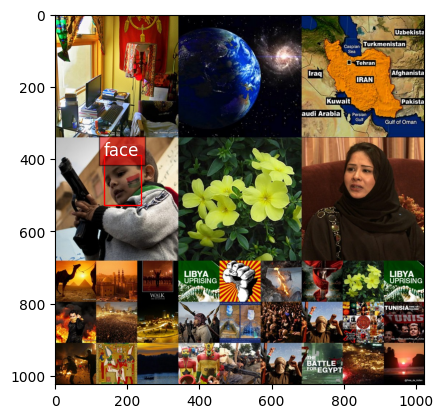

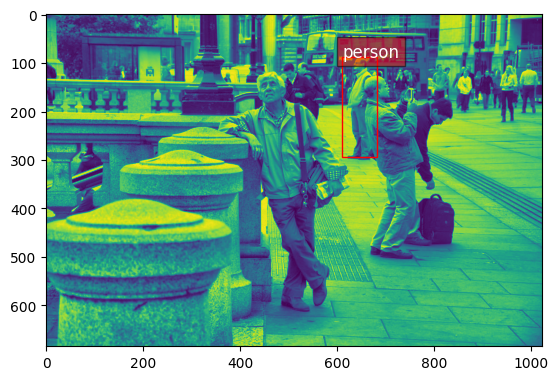

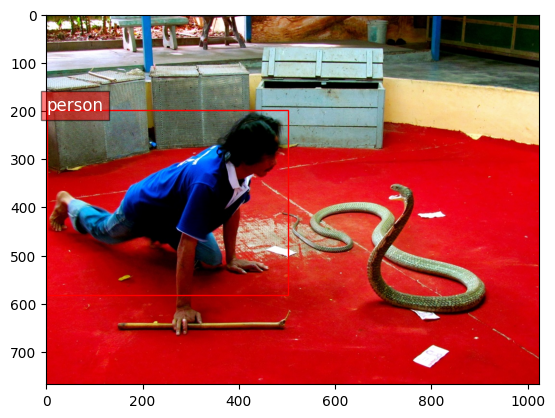

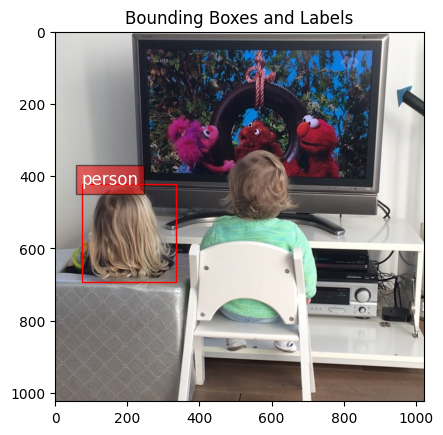

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

df_check = df.sample(10)

for index, row in df_check.iterrows():
    fig, ax = plt.subplots()
    # Assuming all images have the same dimensions for this example
    # Adjust accordingly if they differ
    # image_width = 1024
    # image_height = 1024
    # ax.set_xlim(0, image_width)
    # ax.set_ylim(0, image_height)
    # ax.invert_yaxis()  # Invert y axis to match image coordinates


    # Calculate the bottom left corner of the bounding box
    x = row['col_x'] - row['width'] / 2
    y = row['row_y'] - row['height'] / 2
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), row['width'], row['height'], linewidth=1, edgecolor='r', facecolor='none', label=row['label'])
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    # Add label
    plt.text(x, y, row['label'], color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

    img = plt.imread(row['filename'])
    ax.imshow(img)

plt.title('Bounding Boxes and Labels')
plt.show()


In [11]:
annotation_df = df.copy()

# Run fastdup 

In [12]:
import fastdup
fd = fastdup.create(input_dir='./')
fd.run(annotations=df, ccthreshold=0.9, overwrite=True, license='magical')

/home/dnth/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dnth/anaconda3/envs/yolox-body-head-hand/lib/python3.10/site-packages/fastdup/fastdup_controller.py:849: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._df_annot[FD.ANNOT_FD_ID] = np.arange(len(self._df_annot)).astype(int)


FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2024-02-22 14:45:44 [INFO] Going to loop over dir /tmp/tmp8hunalhk.csv
2024-02-22 14:45:44 [INFO] Found total 1058 images to run on, 1058 train, 0 test, name list 1058, counter 1058 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.tes
2024-02-22 14:45:47 [INFO] Going to loop over dir /tmp/crops_input.csv
2024-02-22 14:45:47 [INFO] Found total 723 images to run on, 723 train, 0 test, name list 723, counter 723 
2024-02-22 14:45:49 [INFO] Found total 723 images to run onstimated: 0 Minutes
Finished histogram 0.120
Finished bucket sort 0.131
2024-02-22 14:45:49 [INFO] 18) Finished write_index() NN model
2024-02-22 14:45:49 [INFO] Stored nn model index file work_dir/nnf.index
2024-02-22 14:45:49 [INFO] Total time took 2029 ms
2024-02-22 14:45:49 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 % of total graph edges
2024-02-22 14:45:49 [INFO] Found a total of 0 nea

0

In [13]:
outliers_df = fd.outliers()
outliers_df

outlier  nearest  distance  score_outlier  col_x_outlier  row_y_outlier  width_outlier  height_outlier label_outlier                                                    crop_filename_outlier                                                         filename_outlier  index_x  is_valid_outlier  score_nearest  col_x_nearest  row_y_nearest  width_nearest  height_nearest label_nearest                                                    crop_filename_nearest                                                         filename_nearest  index_y  is_valid_nearest
0       286      482  0.412240       0.415927          238.5          220.0            477             440        person  work_dir/crops/0/..debug_images050a572e9983d141.jpg_238_220_477_440.jpg  work_dir/crops/0/..debug_images050a572e9983d141.jpg_238_220_477_440.jpg    286.0              True       0.834915           91.0          557.5            182             293        person   work_dir/crops/0/..debug_images097da7049213e31d.jpg_91_557_182_293.jpg   work_dir/crops/0/..debug_images097da7049213e31d.jpg_91_557_182_293.jpg    482.0              True
1       260      593  0.425275       0.879145          507.0          241.0            196             416        person  work_dir/crops/0/..debug_images044cc98a347cdf71.jpg_507_241_196_416.jpg  work_dir/crops/0/..debug_images044cc98a347cdf71.jpg_507_241_196_416.jpg    260.0              True       0.892604          255.0          368.5            204             215        person  work_dir/crops/0/..debug_images0d2da5215089dd3c.jpg_255_368_204_215.jpg  work_dir/crops/0/..debug_images0d2da5215089dd3c.jpg_255_368_204_215.jpg    593.0              True
2       470       93  0.492289       0.504467          244.0          284.5             48              41          face    work_dir/crops/0/..debug_images09659e95c9366ab5.jpg_244_284_48_41.jpg    work_dir/crops/0/..debug_images09659e95c9366ab5.jpg_244_284_48_41.jpg    470.0              True       0.371967          538.5          333.5             37              31          face    work_dir/crops/0/..debug_images017ac0109fad54a2.jpg_538_333_37_31.jpg    work_dir/crops/0/..debug_images017ac0109fad54a2.jpg_538_333_37_31.jpg     93.0              True
3        66      721  0.494481       0.827182          268.5          314.0             93              86          face    work_dir/crops/0/..debug_images00ceafb112cd837e.jpg_268_314_93_86.jpg    work_dir/crops/0/..debug_images00ceafb112cd837e.jpg_268_314_93_86.jpg     66.0              True       0.407185          450.5          271.5            275             157        person  work_dir/crops/0/..debug_images13c67cdd79ab35f0.jpg_450_271_275_157.jpg  work_dir/crops/0/..debug_images13c67cdd79ab35f0.jpg_450_271_275_157.jpg    721.0              True
4       320      719  0.496895       0.695333          455.0          321.0            334             372        person  work_dir/crops/0/..debug_images06767fca65292b4e.jpg_455_321_334_372.jpg  work_dir/crops/0/..debug_images06767fca65292b4e.jpg_455_321_334_372.jpg    320.0              True       0.837095          295.0          163.0            136             134          face  work_dir/crops/0/..debug_images1388631da656924b.jpg_295_163_136_134.jpg  work_dir/crops/0/..debug_images1388631da656924b.jpg_295_163_136_134.jpg    719.0              True
..      ...      ...       ...            ...            ...            ...            ...             ...           ...                                                                      ...                                                                      ...      ...               ...            ...            ...            ...            ...             ...           ...                                                                      ...                                                                      ...      ...               ...
44      296      269  0.538046       0.371351           66.5          618.0            133             24

In [14]:
annotation_df

filename     score  col_x  row_y  width  height   label
0     ../debug_images/0000862a233105cc.jpg  0.832481  316.5  447.0    155     118  person
3     ../debug_images/002e555bd63acb71.jpg  0.853143  696.0  347.0    648     670  person
4     ../debug_images/002e555bd63acb71.jpg  0.791996  166.5  624.0    141     112  person
5     ../debug_images/002e555bd63acb71.jpg  0.759568   66.5  599.5    129     163  person
6     ../debug_images/002e555bd63acb71.jpg  0.757808  289.0  590.5    122     183  person
...                                    ...       ...    ...    ...    ...     ...     ...
1933  ../debug_images/138c4698f334e5ff.jpg  0.380026  529.5  396.0    989     570  person
1935  ../debug_images/13a887093768b5ec.jpg  0.710493  495.5  440.5    245     209  person
1936  ../debug_images/13c67cdd79ab35f0.jpg  0.407185  450.5  271.5    275     157  person
1937  ../debug_images/13c67cdd79ab35f0.jpg  0.350427  601.5  354.5    279     149  person
1939  ../debug_images/13f2fec0dbf286c1.jpg  0.382574  337.0  476.0    592     468  person

[1058 rows x 7 columns]

# Visualize Outliers

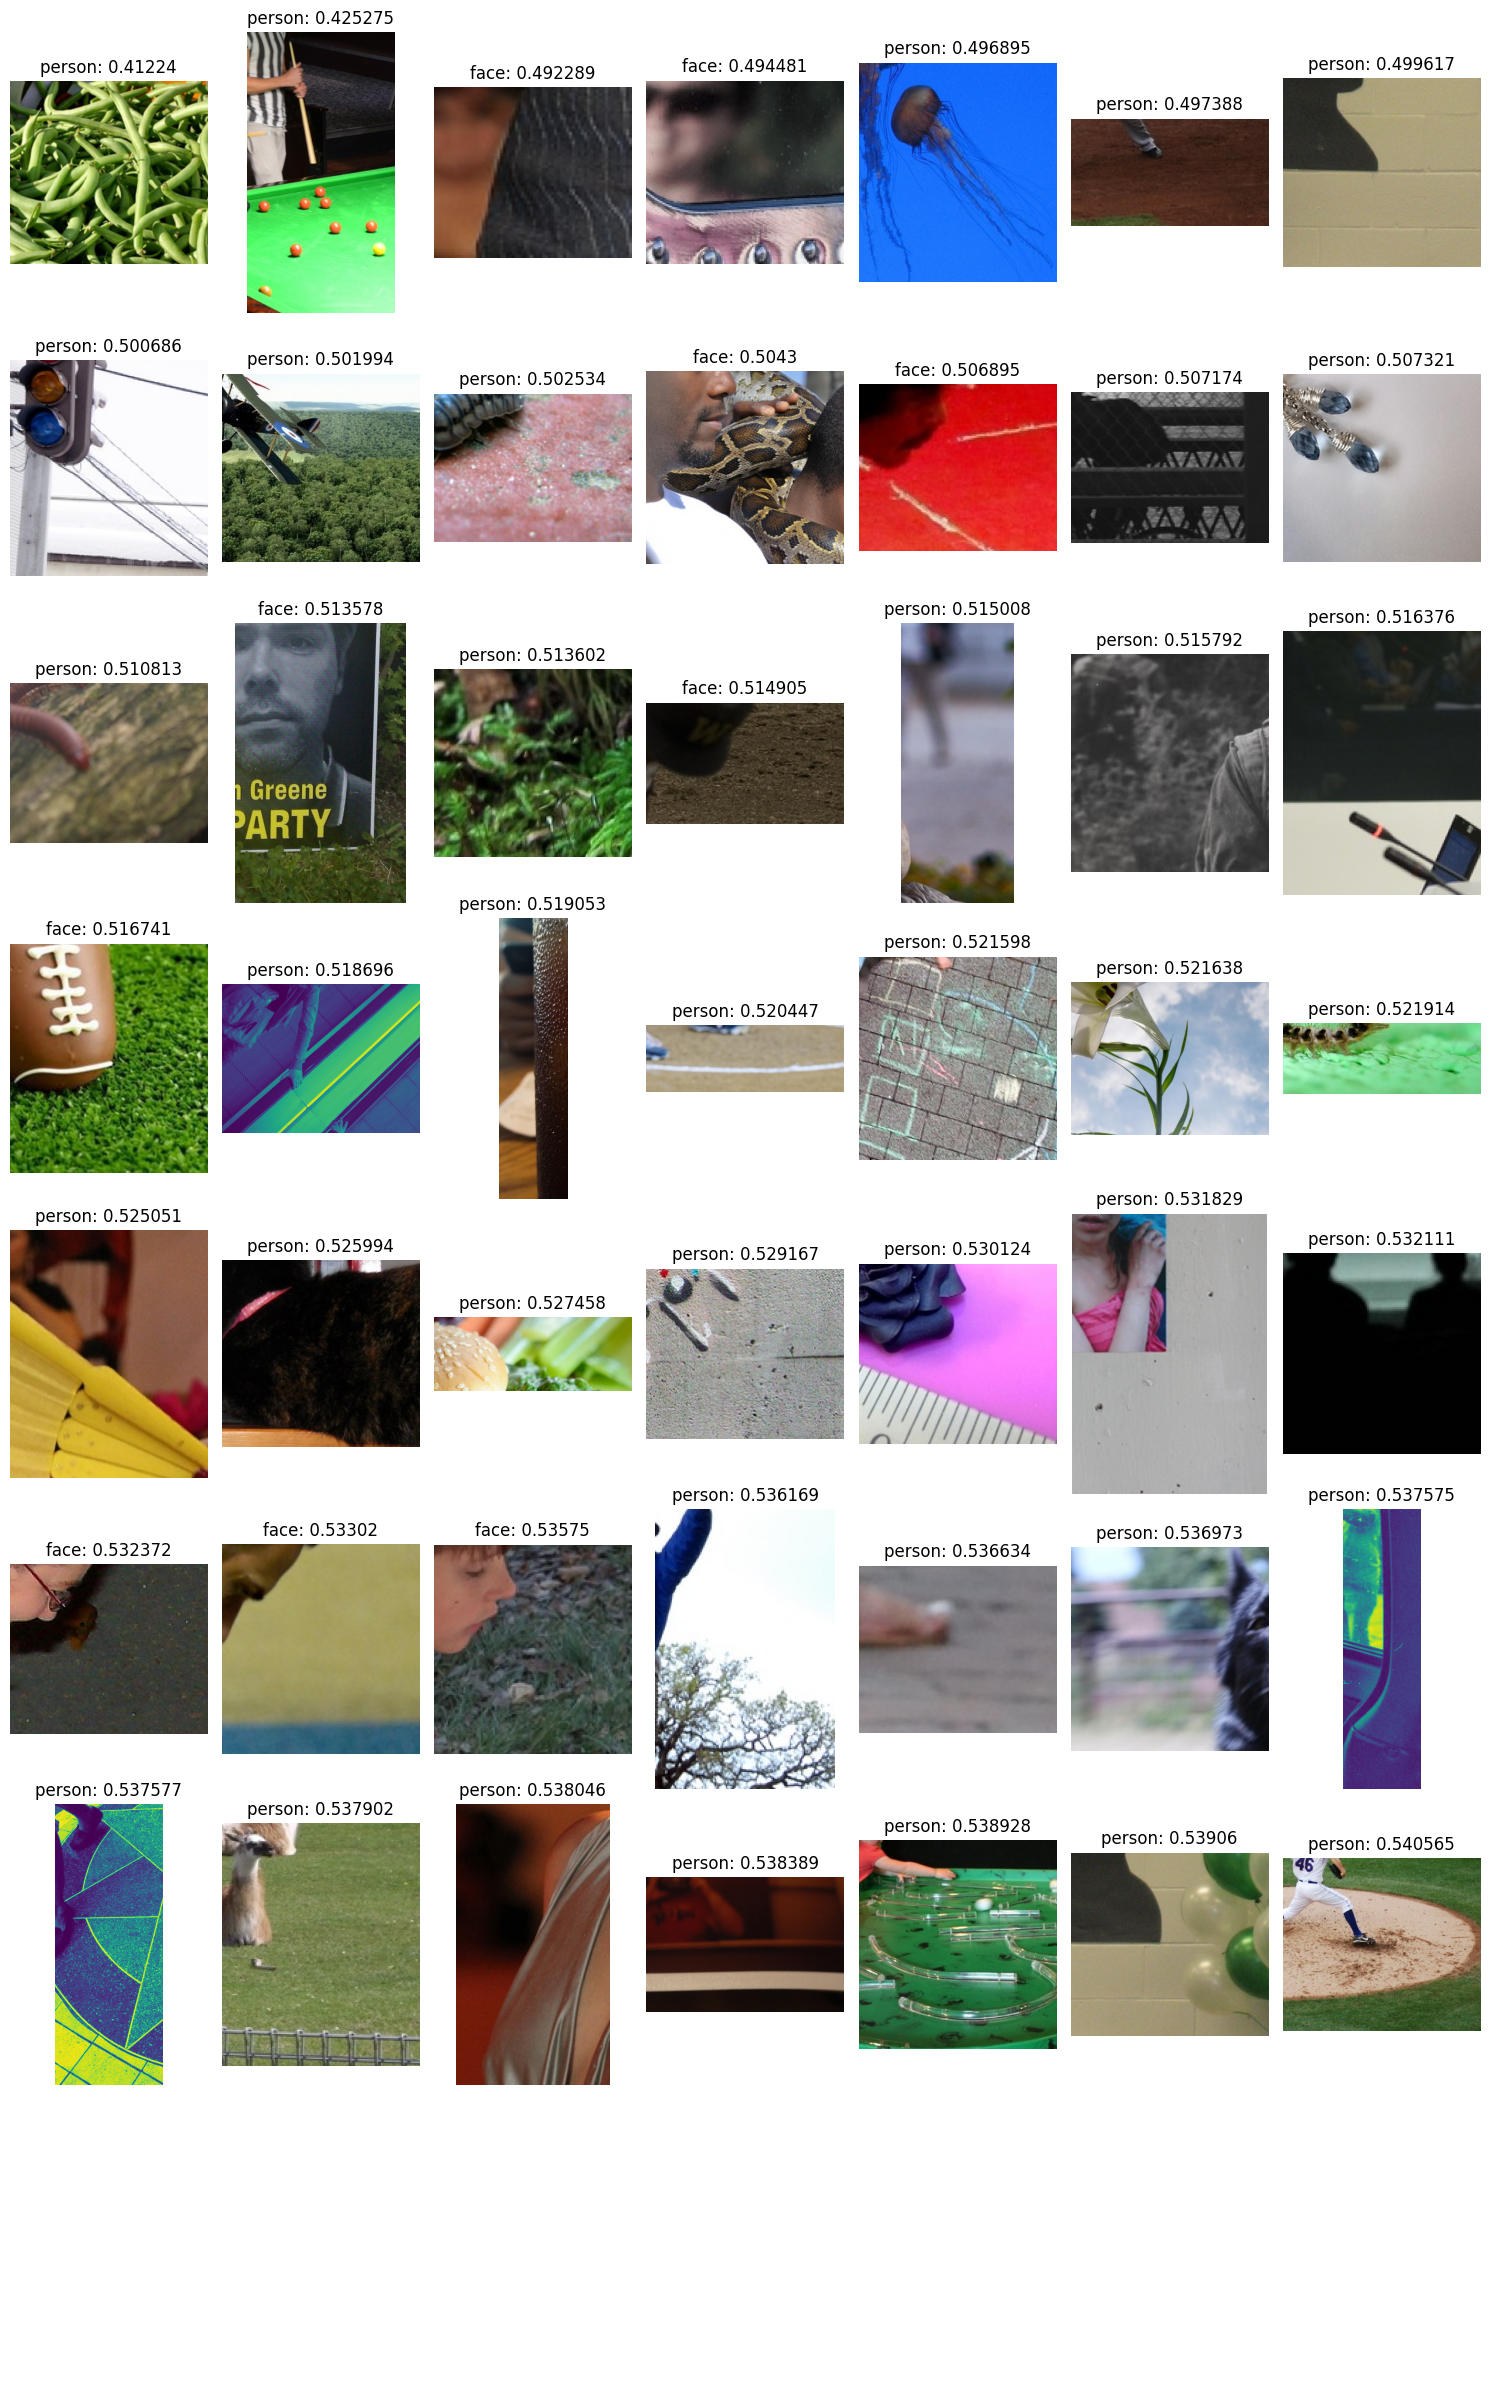

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_df = outliers_df.head(100)

# Determine the size of the grid. You might want to adjust ncols and nrows based on your actual dataframe size
nrows = int(len(sample_df)**0.5) + 1  # Simple way to estimate rows needed
ncols = int(len(sample_df) / nrows) + (len(sample_df) % nrows > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3))  # Adjust figsize as needed

# Flatten the axes array for easy iteration if it's 2D (for multiple rows and cols)
axes = axes.flatten()

for idx, (index, row) in enumerate(sample_df.iterrows()):
    ax = axes[idx]
    image = mpimg.imread(row['crop_filename_outlier'])
    ax.imshow(image)
    ax.set_title(f"{row['label_outlier']}: {row['distance']}")
    ax.axis('off')  # Hide axes ticks

# Turn off any unused subplots
for ax in axes[idx+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Drop Outliers

In [16]:
# Anything lower than 0.65 are considered to be outliers

# outliers_df = outliers_df[outliers_df['distance'] < 0.65]
# outliers_df

In [17]:
outliers_df.rename(columns={'score_outlier':'score', 
                            'col_x_outlier':'col_x', 
                            'row_y_outlier':'row_y', 
                            'width_outlier':'width', 
                            'height_outlier':'height', 
                            'label_outlier':'label', 
                            'distance': 'outlier_distance'}, inplace=True)

outliers_df = outliers_df[['score',	'col_x','row_y','width','height','label', 'outlier_distance']] 
outliers_df

score  col_x  row_y  width  height   label  outlier_distance
0   0.415927  238.5  220.0    477     440  person          0.412240
1   0.879145  507.0  241.0    196     416  person          0.425275
2   0.504467  244.0  284.5     48      41    face          0.492289
3   0.827182  268.5  314.0     93      86    face          0.494481
4   0.695333  455.0  321.0    334     372  person          0.496895
..       ...    ...    ...    ...     ...     ...               ...
44  0.371351   66.5  618.0    133     242  person          0.538046
45  0.909725  471.0  358.5    324     221  person          0.538389
46  0.892604  255.0  368.5    204     215  person          0.538928
47  0.381334  679.5   77.5    167     155  person          0.539060
48  0.924289  521.0  412.0    208     182  person          0.540565

[49 rows x 7 columns]

In [18]:
# Perform the merge with an indicator and include 'distance' from outliers_df
merged_df = annotation_df.merge(outliers_df, on=['col_x', 'row_y', 'width', 'height', 'label', 'score'], how='left', indicator=True)

# Create the 'outlier' column based on the '_merge' indicator
merged_df['outlier'] = merged_df['_merge'] == 'both'

# After the merge, 'distance' column from outliers_df is included in merged_df.
# Rows from annotation_df without a match in outliers_df will have NaN values in 'distance'.

# Drop the '_merge' column as it's no longer needed
merged_df = merged_df.drop('_merge', axis=1)

# Optional: Reset the index
merged_df = merged_df.reset_index(drop=True)

# The resulting dataframe now includes 'distance' and a new 'outlier' column marking true for outliers
updated_annotations = merged_df


In [19]:
updated_annotations

filename     score  col_x  row_y  width  height   label  outlier_distance  outlier
0     ../debug_images/0000862a233105cc.jpg  0.832481  316.5  447.0    155     118  person               NaN    False
1     ../debug_images/002e555bd63acb71.jpg  0.853143  696.0  347.0    648     670  person               NaN    False
2     ../debug_images/002e555bd63acb71.jpg  0.791996  166.5  624.0    141     112  person               NaN    False
3     ../debug_images/002e555bd63acb71.jpg  0.759568   66.5  599.5    129     163  person               NaN    False
4     ../debug_images/002e555bd63acb71.jpg  0.757808  289.0  590.5    122     183  person               NaN    False
...                                    ...       ...    ...    ...    ...     ...     ...               ...      ...
1053  ../debug_images/138c4698f334e5ff.jpg  0.380026  529.5  396.0    989     570  person               NaN    False
1054  ../debug_images/13a887093768b5ec.jpg  0.710493  495.5  440.5    245     209  person               NaN    False
1055  ../debug_images/13c67cdd79ab35f0.jpg  0.407185  450.5  271.5    275     157  person               NaN    False
1056  ../debug_images/13c67cdd79ab35f0.jpg  0.350427  601.5  354.5    279     149  person               NaN    False
1057  ../debug_images/13f2fec0dbf286c1.jpg  0.382574  337.0  476.0    592     468  person               NaN    False

[1058 rows x 9 columns]

In [20]:
updated_annotations.to_parquet(f"../parquets/clean_{parquet_filename}")

In [21]:
# !rm -r work_dir